In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

Activation Functions

In [238]:
# Heaviside step function 

def heavyside(x):
    if (x >= 0):
        return 1
    else :
        return 0
        
# Rectified error Linear Unit function

def relu(x):
    return max(0,x)

# Sigmoid function

def activation_sigmoid(t):
        return 1/(1+np.exp(-t))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(t):
    return np.exp(t)/np.sum(np.exp(t))

# Gassian error Linear Unit GeLU function

Neural Network

In [35]:
data = load_diabetes()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [276]:
class NeuralNetwork :

    def __init__(self, X_train, y_train):
        self.layers_wieghts = []
        self.layers_bias = []
        self.X_train = X_train
        self.y_train = y_train
        n = X_train.shape[1]
        self.layers_wieghts.append(np.random.rand(n))
        self.layers_bias.append(np.random.rand(1))

    def activation_sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def activation_sigmoid_derivative(self, t):
        return np.exp(-t)/(1+np.exp(-t))**2

    def loss(self, X_train, y_train):
        y_hat = self.out(X_train)
        return mean_squared_error(y_hat, y_train)

    def loss_for_a_sample(self,x,y):
        y_hat = self.out(x)
        return np.mean((y_hat-y)**2)
                                  
    def integrate_layer(self,layer_index, x):
        out = self.layers_wieghts[layer_index]@x + self.layers_bias[layer_index]
        return  self.activation_sigmoid(out)
    
    def add_layer(self, layer_size):
        self.layers_wieghts.append(np.random.rand(layer_size, len(self.layers_bias[-1])))
        self.layers_bias.append(np.random.rand(layer_size))
        
    def update_weights(self, layer_index, delta_w):
        self.layers_wieghts[layer_index]  = self.layers_wieghts[layer_index]  + delta_w

    def update_bias(self, layer_index, delta_b):
        self.layers_bias[layer_index]  = self.layers_bias[layer_index] + delta_b 

    def delete_layer(self):
        if len(self.layers) > 1:
            self.layers.pop()
        else :
            print("No Hidden Layers to delete")

    def backward(self, X_):
        alpha = 100000
        activations = self.get_activations(X_)
        l = len(self.layers_bias)

        # Inititaion Output Layer
        E_d = (y_train[0] - self.layers_wieghts[l-1] @ activations[l-2] - self.layers_bias[l-1])
        E_d = E_d*self.activation_sigmoid_derivative(E_d)
        delta_w = -alpha*2* E_d @ activations[l-2].T.reshape(-1, len(activations[l-2]))
        delta_b = -alpha*2* E_d
        delta_a_l = -alpha*2*E_d @ self.layers_wieghts[l-1]
        self.update_weights(l-1, delta_w)
        self.update_bias(l-1, delta_b)
        delta_a_l = -alpha*2*E_d @ self.layers_wieghts[l-1]
        
        # Hidden Layers
        for i in range(l-2,0,-1):
            delta_w = -(alpha*2* delta_a_l).reshape(len(delta_a_l),1) @ activations[i-1].T.reshape(-1, len(activations[i-1]))
            delta_b = -alpha*2* delta_a_l
            self.update_weights(i, delta_w)
            self.update_bias(i, delta_b)
            delta_a_l = -alpha*2*delta_a_l @ self.layers_wieghts[i]
            delta_a_l = delta_a_l*self.activation_sigmoid_derivative(delta_a_l)
        
        # Input Layer
        delta_w = -alpha*2* delta_a_l.reshape(len(delta_a_l),1) @ X_.T.reshape(-1,len(X_))
        delta_b = -alpha*2* delta_a_l
        self.update_weights(0, delta_w)
        self.update_bias(0, delta_b)
    
    def get_activations(self, X_):
        l = len(self.layers_bias)
        activations = []
        previous_out = self.integrate_layer(0, X_).copy()
        activations.append(previous_out)
        for i in range(1,l):
            current_out = self.integrate_layer(i,previous_out).copy()
            previous_out = current_out.copy()
            activations.append(previous_out)
        return activations

    def forward(self, X_):
        l = len(self.layers_bias)
        previous_out = self.integrate_layer(0, X_).copy()
        for i in range(1,l):
            current_out = self.integrate_layer(i,previous_out).copy()
            previous_out = current_out.copy()
        return previous_out
    
    def train(self):
        max_epochs = 100
        for e in range(max_epochs):
            for i in range(len(self.X_train)):
                self.backward(X_train[i])
            print(mean_squared_error(activation_sigmoid(y_test),self.predict(X_test)))

    def predict(self, X_test):
        n = len(X_test)
        m = len(self.layers_bias[-1])
        prediction = np.empty((n,m))
        for i in range(n):
            out = self.forward(X_test[i])
            for j in range(m):
                prediction[i][j] = out[j]
        return prediction


In [277]:
nn = NeuralNetwork(X_train,y_train)
nn.add_layer(9)
nn.add_layer(8)
nn.add_layer(7)
nn.add_layer(6)
nn.add_layer(5)
nn.add_layer(3)
nn.add_layer(1)

In [278]:
nn.train()

0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.018537004985477622
0.01853700498

In [279]:
y_hat = nn.predict(X_test)

In [280]:
y_hat

array([[0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384932],
       [0.86384934],
       [0.86384934],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384932],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384933],
       [0.86384934],
       [0.863

In [281]:
mean_squared_error(activation_sigmoid(y_test),y_hat)

0.018537004985477622

PyTorch Implementation

In [10]:
# Dataset
data = load_diabetes()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test= torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Model
model = nn.Sequential(
    nn.Linear(10, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)
print(model)
 
# train the model
loss_fn   = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Sequential(
  (0): Linear(in_features=10, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)
Finished epoch 0, latest loss 20734.810546875
Finished epoch 1, latest loss 20678.904296875
Finished epoch 2, latest loss 20596.447265625
Finished epoch 3, latest loss 20464.623046875
Finished epoch 4, latest loss 20251.490234375
Finished epoch 5, latest loss 19934.138671875
Finished epoch 6, latest loss 19493.369140625
Finished epoch 7, latest loss 18913.470703125
Finished epoch 8, latest loss 18184.2265625
Finished epoch 9, latest loss 17302.099609375
Finished epoch 10, latest loss 16271.1376953125
Finished epoch 11, latest loss 15103.5869140625
Finished epoch 12, latest loss 13820.11328125
Finished epoch 13, latest loss 12449.4658203125
Finished epoch 14, latest loss 11027.53125
Finished epoch 15, latest loss 9595.677734375
Finished epoch 16, latest loss 8198.3427734375
Fin

In [12]:
y_hat = model(X_test)

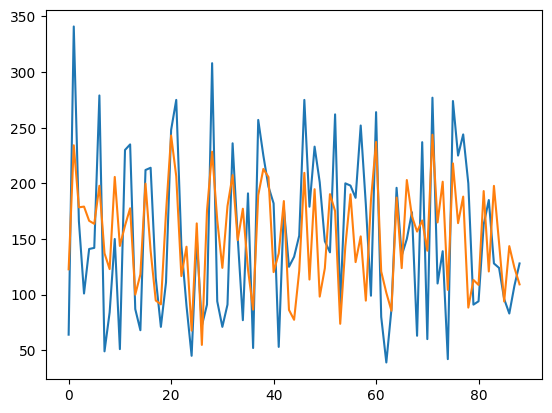

In [19]:
sr = np.arange(len(y_test))
plt.plot(sr, np.array(y_test))
plt.plot(sr,y_hat.detach().numpy())
plt.show()